In [97]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
import pandas as pd
import numpy as np
from accrual import process_crsp, process_compustat, merge_data, backtest

In [20]:
data = process_crsp('data/crsp_monthly2.gz')

Total rows: 4335433
1950-01-31 00:00:00 to 2018-12-31 00:00:00
Remove all NAs: 4304938 (99.30%)
Remove Zs: 4302309 (99.24%)
Remove financials: 3168271 (73.08%)
Remove delisted rows: 3081542 (71.08%)
Remove duplicated rows: 3065321 (70.70%)
Duplicated for key [PERMNO, date]: 0
PERMNO year: 276015


In [33]:
funda = process_compustat('data/compustat_annual.gz')

Total rows: 302087
Drop NAs: 232651 (77.01%)
Duplicated PERMNO fyear: 2
Drop duplicates: 232649 (77.01%)
Duplicated PERMNO fyear: 0
Zero total asset: 23
Drop zero AT: 232626 (77.01%)
Merged with previous fyear: 220785 (73.09%)
Final rows: 220409 (72.96%)


In [36]:
merged = merge_data(data.reset_index(), funda)

Total rows: 276015
Valid PERMNO: 254461 (92.19%)
Merged: 254461 (92.19%)
Filled: 254461 (92.19%)
Drop NAs: 211696 (76.70%)


In [84]:
aaa.index.values

array([ 1553,  1665,  3111,  3828,  4346,  4470,  4528,  5595,  6777,
        7136,  7757,  7875,  9713, 11188, 12449, 12926, 15248, 16150,
       17762, 18298, 18359, 18711, 20105, 20703, 20852, 21267, 22247,
       22761, 23885, 24360, 24432, 24830, 27028, 27169, 27273, 30128,
       30321, 31083, 31373, 31514, 31927, 31991, 32278, 34238, 34401,
       35126, 35198, 35519, 35615, 36191, 37518, 37582, 37789, 37874,
       38044, 38106, 38353, 38475, 39304, 39696, 40022, 40989, 41127,
       41335, 41617, 41818, 42213, 42354, 42572, 42918, 43056, 43403,
       43541, 43783, 44030, 44119, 44294, 44617, 44735, 44775, 44876,
       45021, 45064, 45287, 45525, 45565, 45611, 45661, 45884, 45965,
       46562, 46686, 46791, 47026, 47128, 47377, 47457, 47598, 47749,
       48163, 48982, 49175, 49531, 49568, 49800, 49839, 50181, 50348,
       50799, 50901, 51246, 51553, 51630, 51699, 51770, 51842, 51949,
       52022, 52091, 52216, 52529, 52588, 52691, 52753, 53514, 53786,
       54374, 54544,

In [99]:
equity = backtest(merged)

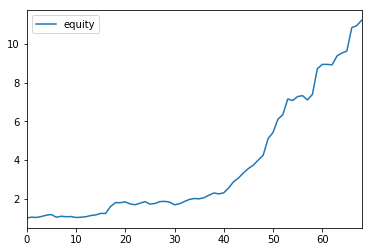

In [100]:
pd.DataFrame({'equity': (np.array(equity) + 1).cumprod()}).plot()

In [127]:
raw = pd.read_csv('data/crsp_monthly_shrcd.gz', compression='gzip', parse_dates=['date'], infer_datetime_format='%Y%m%d',
                      dtype={'SICCD': str, 'PERMNO': str, 'PERMCO': str, 'PRC': str, 'RET': str, 'CFACPR': str})


In [134]:
data.reset_index().groupby('year').PERMNO.nunique()

year
1950     960
1951     976
1952     990
1953    1000
1954    1000
1955    1015
1956    1008
1957    1030
1958    1021
1959    1034
1960    1069
1961    1092
1962    1924
1963    1984
1964    2027
1965    2073
1966    2093
1967    2141
1968    2156
1969    2199
1970    2257
1971    2325
1972    4636
1973    4743
1974    4412
1975    4279
1976    4305
1977    4256
1978    4192
1979    4108
        ... 
1989    5459
1990    5282
1991    5355
1992    5566
1993    5936
1994    6357
1995    6699
1996    7209
1997    7463
1998    7290
1999    7117
2000    6912
2001    6315
2002    5680
2003    5231
2004    5069
2005    5032
2006    4946
2007    4904
2008    4592
2009    4357
2010    4248
2011    4174
2012    4077
2013    4101
2014    4227
2015    4295
2016    4221
2017    4190
2018    4230
Name: PERMNO, Length: 69, dtype: int64

In [129]:
raw['year'] = raw.date.dt.year
raw.groupby('year').PERMNO.nunique()

year
1965    2182
1966    2213
1967    2253
1968    2288
1969    2345
1970    2404
1971    2500
1972    2632
1973    2682
1974    2670
1975    2614
1976    2590
1977    2558
1978    2511
1979    2444
1980    2405
1981    2412
1982    2363
1983    2345
1984    2359
1985    2332
1986    2334
1987    2314
1988    2319
1989    2231
1990    2189
1991    2204
1992    2322
1993    2409
1994    2454
1995    2543
1996    2634
1997    2742
1998    2789
1999    2753
2000    2632
2001    2444
2002    2322
2003    2266
2004    2243
2005    2235
2006    2189
2007    2165
2008    2014
2009    1863
2010    1782
2011    1739
2012    1687
2013    1699
2014    1687
2015    1679
2016    1615
2017    1563
2018    1524
Name: PERMNO, dtype: int64

In [118]:
# (data.groupby('year').RET.mean() + 1).cumprod()
# data.groupby('year').RET.mean()
# data[data.year == 2013]
aaa = data.reset_index()
aaa[aaa.year == 2013]

,PERMNO,year,RET
29,10001,2013,-0.090694
261,10025,2013,-0.108052
292,10026,2013,0.400294
330,10028,2013,-0.589318
394,10032,2013,0.677907
514,10044,2013,0.137966
589,10051,2013,0.437862
1017,10100,2013,-0.337076
1090,10104,2013,0.156647
1125,10107,2013,0.441807


In [412]:
filename = 'data/crsp_monthly2.gz'
raw = pd.read_csv(filename, compression='gzip', parse_dates=['date'], infer_datetime_format='%Y%m%d',
                       dtype={'SICCD': str, 'PERMNO': str, 'PERMCO': str, 'PRC': str, 'RET': str, 'CFACPR': str})

columns_kept = ['date', 'PERMNO', 'SICCD', 'TICKER', 'DLSTCD', 'RET']
tota_rows = raw.shape[0]
print(f'Total rows: {tota_rows}')
print(f'{data.date.min()} to {data.date.max()}')

# trick to dropna without removing PERMNO and date
data = raw[columns_kept].set_index(['date', 'PERMNO']).dropna(how='all').reset_index()
print(f'Remove all NAs: {data.shape[0]} ({data.shape[0] / tota_rows:.2%})')

data = data[(data.SICCD != 'Z') & (data.RET != 'C')]
print(f'Remove Zs and Cs: {data.shape[0]} ({data.shape[0] / tota_rows:.2%})')

data.DLSTCD.replace(np.nan, 0, inplace=True)
data.SICCD = data.SICCD.astype('int')

data = data[(data.SICCD < 6000) | (data.SICCD >= 7000)]
print(f'Remove financials: {data.shape[0]} ({data.shape[0] / tota_rows:.2%})')

data = data.groupby('PERMNO', as_index=False).apply(
    lambda x: x.iloc[:x.reset_index().DLSTCD.ne(0).idxmax()]).reset_index(drop=True)
print(f'Remove delisted rows: {data.shape[0]} ({data.shape[0] / tota_rows:.2%})')

data = data.drop_duplicates()
print(f'Remove duplicated rows: {data.shape[0]} ({data.shape[0] / tota_rows:.2%})')

primary_keys = ['PERMNO', 'date']
join_keys = ['PERMNO', 'month_end']
data['month_end'] = data.date + MonthEnd(0)
print('Duplicated for key [PERMNO, Month End]')
data[data[join_keys].duplicated()]

Total rows: 4335433
1950-01-31 00:00:00 to 2018-11-30 00:00:00
Remove all NAs: 4304938 (99.30%)
Remove Zs and Cs: 4268885 (98.47%)
Remove financials: 3144405 (72.53%)
Remove delisted rows: 3058396 (70.54%)
Remove duplicated rows: 3042211 (70.17%)
Duplicated for key [PERMNO, Month End]


,date,PERMNO,SICCD,TICKER,DLSTCD,RET,month_end


In [41]:
filename = 'data/compustat_annual.gz'

fund = pd.read_csv(filename, compression='gzip', parse_dates=['datadate'], infer_datetime_format='%Y%m%d', 
                   dtype={'LPERMNO': str}).rename({'LPERMNO': 'PERMNO', 'datadate': 'date'}, axis=1)


In [631]:
filename = 'data/compustat_annual.gz'

fund = pd.read_csv(filename, compression='gzip', parse_dates=['datadate'], infer_datetime_format='%Y%m%d', 
                   dtype={'LPERMNO': str}).rename({'LPERMNO': 'PERMNO', 'datadate': 'date'}, axis=1)
fund['month_end'] = fund.date + MonthEnd(0)
print(f'Duplicated rows: {fund[join_keys].duplicated().sum()}')
total = fund.shape[0]
print(f'Total rows: {total}')

required_cols = ['act', 'at', 'che', 'dlc', 'dltt', 'ivao', 'ivst', 'lct', 'lt', 'oiadp', 'pstk']
critical_cols = ['at', 'che', 'act', 'lct', 'lt', 'oiadp']
fund = fund[['PERMNO', 'month_end', 'fyear'] + required_cols].dropna(how='any', subset=critical_cols)
fund = fund.fillna({'dltt': 0, 'dlc': 0, 'pstk': 0, 'ivst': 0, 'ivao': 0})
print(f'Drop NAs: {fund.shape[0]} ({fund.shape[0] / total:.2%})')

dup = fund[['PERMNO', 'fyear']].duplicated().sum()
print(f'Duplicated PERMNO fyear: {dup}')

fund.drop_duplicates(subset=['PERMNO', 'fyear'], keep='last', inplace=True)
print(f'Drop duplicates: {fund.shape[0]} ({fund.shape[0] / total:.2%})')
dup = fund[['PERMNO', 'fyear']].duplicated().sum()
print(f'Duplicated PERMNO fyear: {dup}')

zero = (fund["at"] == 0).sum()
print(f'Zero total asset: {zero}')
fund = fund[fund['at'] != 0]
print(f'Drop zero AT: {fund.shape[0]} ({fund.shape[0] / total:.2%})') 

# calculate metrics
fund['coa'] = fund.act - fund.che
fund['col'] = fund.lct - fund.dlc
fund['wc'] = fund.coa - fund.col
fund['ncoa'] = fund['at'] - fund.act - fund.ivao
fund['ncol'] = fund['lt'] - fund.lct - fund.dltt
fund['nco'] = fund.ncoa - fund.ncol
fund['fina'] = fund.ivst + fund.ivao
fund['finl'] = fund.dltt + fund.dlc + fund.pstk
fund['fin'] = fund.fina - fund.finl

fund['fyear1'] = fund.fyear.shift()
fund = fund.merge(fund, left_on=['PERMNO', 'fyear1'], right_on=['PERMNO', 'fyear'], how='left', suffixes=('', '1')).dropna()
print(f'Merged with previous fyear: {fund.shape[0]} ({fund.shape[0] / total:.2%})')

# delta metrics
fund['avg_at'] = (fund['at'] + fund['at1']) / 2
fund['roa'] = fund.oiadp / fund.avg_at
fund['dwc'] = (fund.wc - fund.wc1) / fund.avg_at
fund['dnco'] = (fund.nco - fund.nco1) / fund.avg_at
fund['dfin'] = (fund.fin - fund.fin1) / fund.avg_at
fund['tacc'] = fund.dwc + fund.dnco + fund.dfin
fund.drop([col for col in fund.columns if '1' in col], axis=1, inplace=True)

Duplicated rows: 0
Total rows: 302087
Drop NAs: 232651 (77.01%)
Duplicated PERMNO fyear: 2
Drop duplicates: 232649 (77.01%)
Duplicated PERMNO fyear: 0
Zero total asset: 23
Drop zero AT: 232626 (77.01%)
Merged with previous fyear: 220785 (73.09%)


In [656]:
valid_no = fund.PERMNO.unique()
total = data.shape[0]
print(f'Total rows: {total}')

merged = data[data.PERMNO.isin(valid_no)]
print(f'Valid PERMNO: {merged.shape[0]} ({merged.shape[0] / total:.2%})')

merged = merged.join(fund.set_index(join_keys), on=join_keys, how='left')
print(f'Merged: {merged.shape[0]} ({merged.shape[0] / total:.2%})')

filled = merged.groupby('PERMNO', as_index=False).fillna(method='ffill')
print(f'Filled: {filled.shape[0]} ({filled.shape[0] / total:.2%})')

filled = filled.dropna()
print(f'Drop NAs: {filled.shape[0]} ({filled.shape[0] / total:.2%})')

Total rows: 3042211
Valid PERMNO: 2835148 (93.19%)
Merged: 2835148 (93.19%)
Filled: 2835148 (93.19%)
Drop NAs: 2450110 (80.54%)


In [ ]:
fund['roa'] = fund.oiadp / fund.avg_at
fund['dwc'] = (fund.wc - fund.wc1) / fund.avg_at
fund['dnco'] = (fund.nco - fund.nco1) / fund.avg_at
fund['dfin'] = (fund.fin - fund.fin1) / fund.avg_at
fund['tacc'] = fund.dwc + fund.dnco + fund.dfin

In [680]:
panel = data
panel['year'] = panel.month_end.dt.year
panel.RET = panel.RET.replace('B', 0).astype('float')
panel = panel.groupby(['PERMNO', 'year']).agg({'RET': lambda x: (1 + x).prod() - 1 })

In [686]:
data[data.PERMNO == '10000']

,date,PERMNO,SICCD,TICKER,DLSTCD,RET,month_end,year
0,1986-02-28,10000,3990,OMFGA,0.0,-0.257143,1986-02-28,1986
1,1986-03-31,10000,3990,OMFGA,0.0,0.365385,1986-03-31,1986
2,1986-04-30,10000,3990,OMFGA,0.0,-0.098592,1986-04-30,1986
3,1986-05-30,10000,3990,OMFGA,0.0,-0.222656,1986-05-31,1986
4,1986-06-30,10000,3990,OMFGA,0.0,-0.005025,1986-06-30,1986
5,1986-07-31,10000,3990,OMFGA,0.0,-0.080808,1986-07-31,1986
6,1986-08-29,10000,3990,OMFGA,0.0,-0.615385,1986-08-31,1986
7,1986-09-30,10000,3990,OMFGA,0.0,-0.057143,1986-09-30,1986
8,1986-10-31,10000,3990,OMFGA,0.0,-0.242424,1986-10-31,1986
9,1986-11-28,10000,3990,OMFGA,0.0,0.060000,1986-11-30,1986


In [685]:
panel.head()

RET
PERMNO year          
10000  1986  0.117857
       1987  0.424243
10001  1986  1.217369
       1987  0.898725
       1988  1.163160

In [671]:
last_obj = lambda x: x.tail(1)
panel = filled.groupby(['PERMNO', 'fyear']).agg({'dwc': last_obj, 'dnco': last_obj, 'tacc': last_obj, 'RET': lambda x: x.prod()})

TypeError: can't multiply sequence by non-int of type 'str'

In [ ]:
panel.shape

In [666]:
start_year = filled.date.min().year
end_year = filled.date.max().year

position = {}
for year in range(start_year, end_year):
    

1962